In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install seaborn==0.13.0

  Obtaining dependency information for seaborn==0.13.0 from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets 
import matplotlib.pyplot as plt
import utils
import sys

from IPython.display import display

In [5]:
DATA_FILE_PATH = "../dataset/heart.csv"

In [6]:
# Load data
heart_data = pd.read_csv(DATA_FILE_PATH)
heart_data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [7]:
heart_data.shape

(918, 12)

In [8]:
# Get the information of this data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Check missing values
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

This data does not have missing values

In [10]:
for c in heart_data.columns:
    num = len(heart_data[c].unique())
    dtype = heart_data[c].dtype
    print(f"Number of unique values of feature {c} with type {dtype} is {num}")

Number of unique values of feature Age with type int64 is 50
Number of unique values of feature Sex with type object is 2
Number of unique values of feature ChestPainType with type object is 4
Number of unique values of feature RestingBP with type int64 is 67
Number of unique values of feature Cholesterol with type int64 is 222
Number of unique values of feature FastingBS with type int64 is 2
Number of unique values of feature RestingECG with type object is 3
Number of unique values of feature MaxHR with type int64 is 119
Number of unique values of feature ExerciseAngina with type object is 2
Number of unique values of feature Oldpeak with type float64 is 53
Number of unique values of feature ST_Slope with type object is 3
Number of unique values of feature HeartDisease with type int64 is 2


Patients with normal health condiontion: 410 people
Patients with heart disease: 508 people


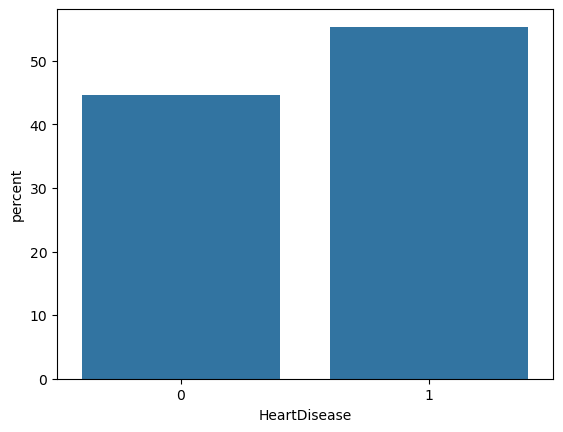

In [11]:
# Check the balance of the dataset.
healthy = sum(heart_data["HeartDisease"] == 0)
disease = sum(heart_data["HeartDisease"] == 1)
_ = sns.countplot(data=heart_data, x="HeartDisease", stat="percent")
print(f"Patients with normal health condiontion: {healthy} people")
print(f"Patients with heart disease: {disease} people")

- The ratio of patients with heart disease to individuals with normal health conditions is relatively balanced.

### Numeric features
Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak

In [12]:
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Create a dataframe with descriptive statistics
descriptive_stats = heart_data[numerical_features].describe()
descriptive_stats.apply(lambda s: s.apply('{0:.4f}'.format))

Age RestingBP Cholesterol     MaxHR   Oldpeak
count  918.0000  918.0000    918.0000  918.0000  918.0000
mean    53.5109  132.3965    198.7996  136.8094    0.8874
std      9.4326   18.5142    109.3841   25.4603    1.0666
min     28.0000    0.0000      0.0000   60.0000   -2.6000
25%     47.0000  120.0000    173.2500  120.0000    0.0000
50%     54.0000  130.0000    223.0000  138.0000    0.6000
75%     60.0000  140.0000    267.0000  156.0000    1.5000
max     77.0000  200.0000    603.0000  202.0000    6.2000

In [13]:
# Create an interactive histogram
utils.plot_histogram(heart_data, numerical_features, bins=32)

interactive(children=(Dropdown(description='Feature', options=('Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Ol…

In [14]:
# Create an interactive box/violin
utils.plot_box_violin(heart_data, numerical_features)

interactive(children=(Dropdown(description='Feature', options=('Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Ol…

In [15]:
# Create an interactive scatterplot
utils.scatterplot(heart_data, numerical_features)

interactive(children=(Dropdown(description='X-Axis', options=('Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Old…

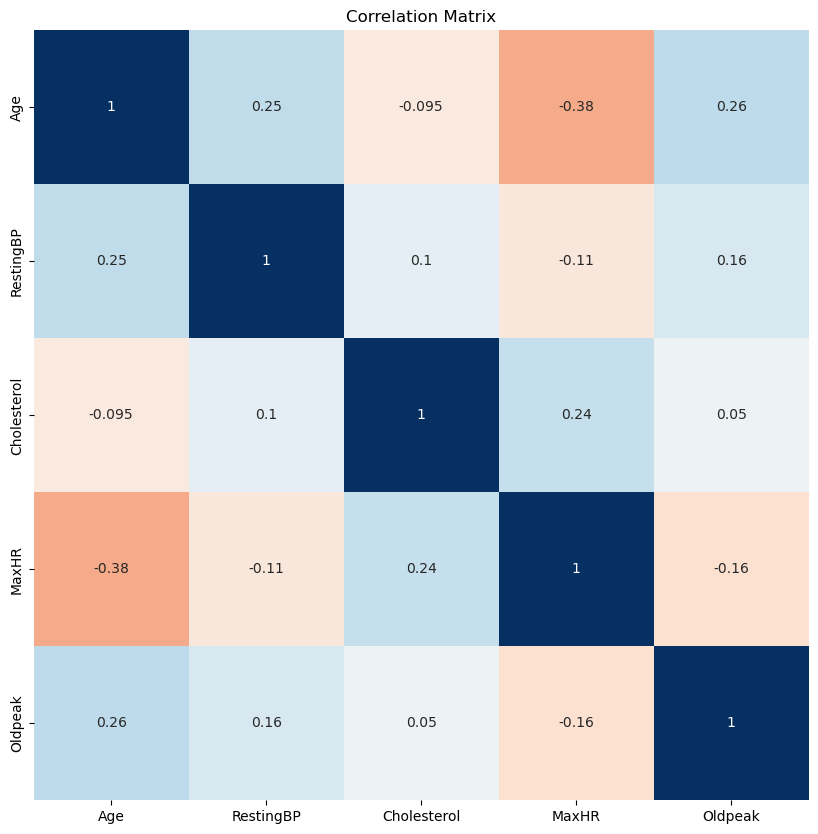

In [16]:
# Create a correlation matrix of features
utils.correlation_matrix(heart_data[numerical_features])

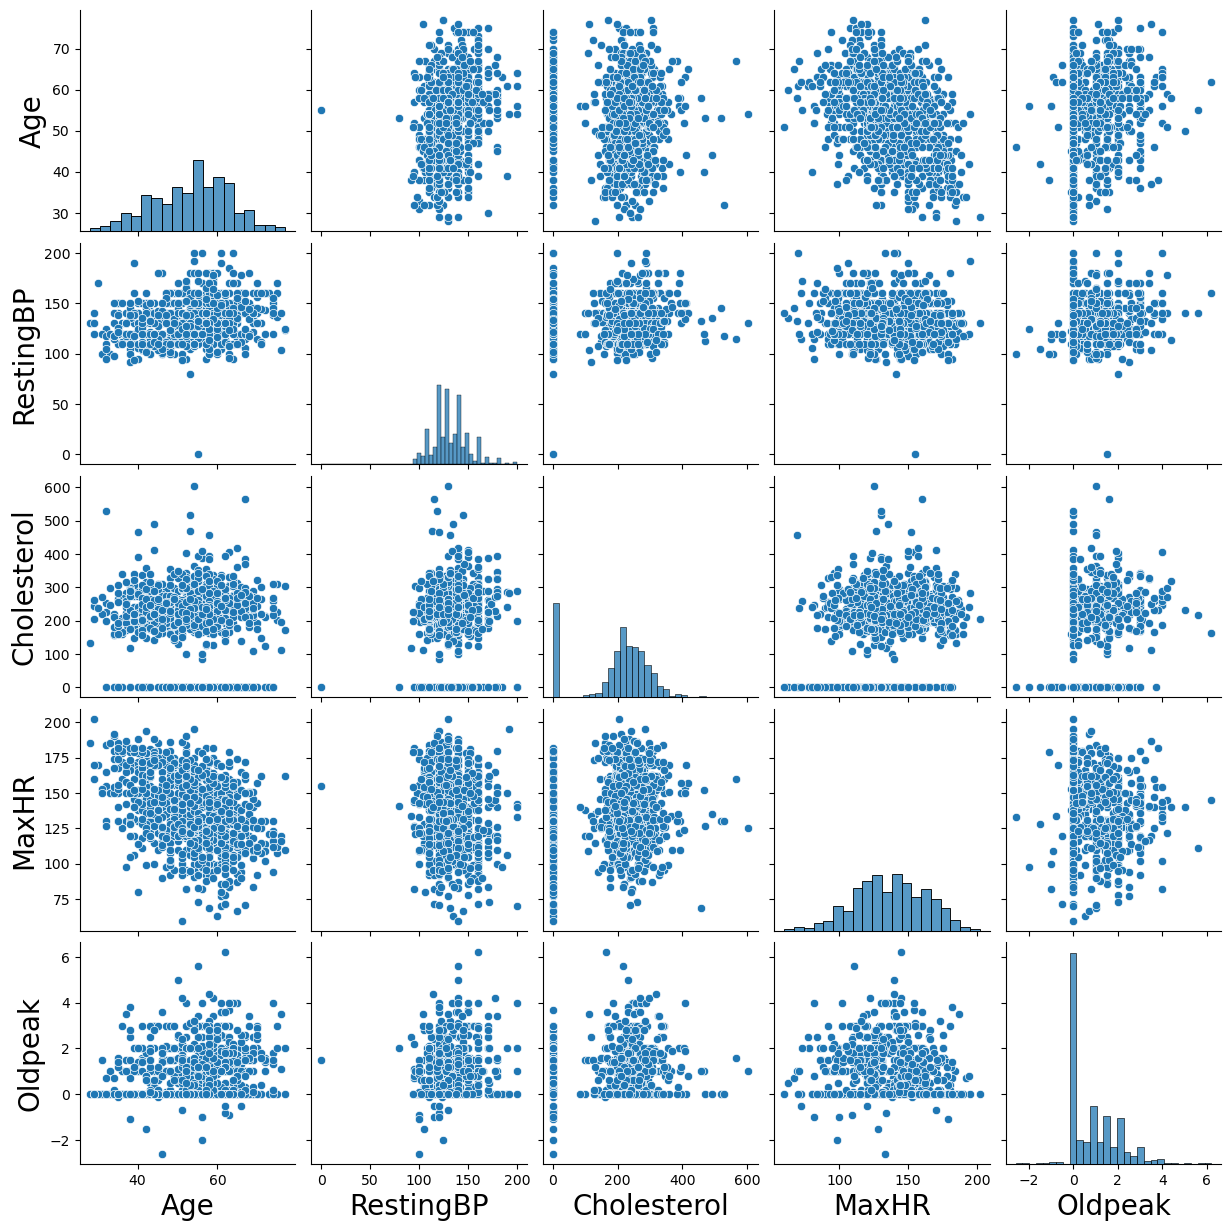

In [17]:
# Create a pair plot of features
utils.plot_pairplot(heart_data, numerical_features)

- The numerical features are not strongly correlated.

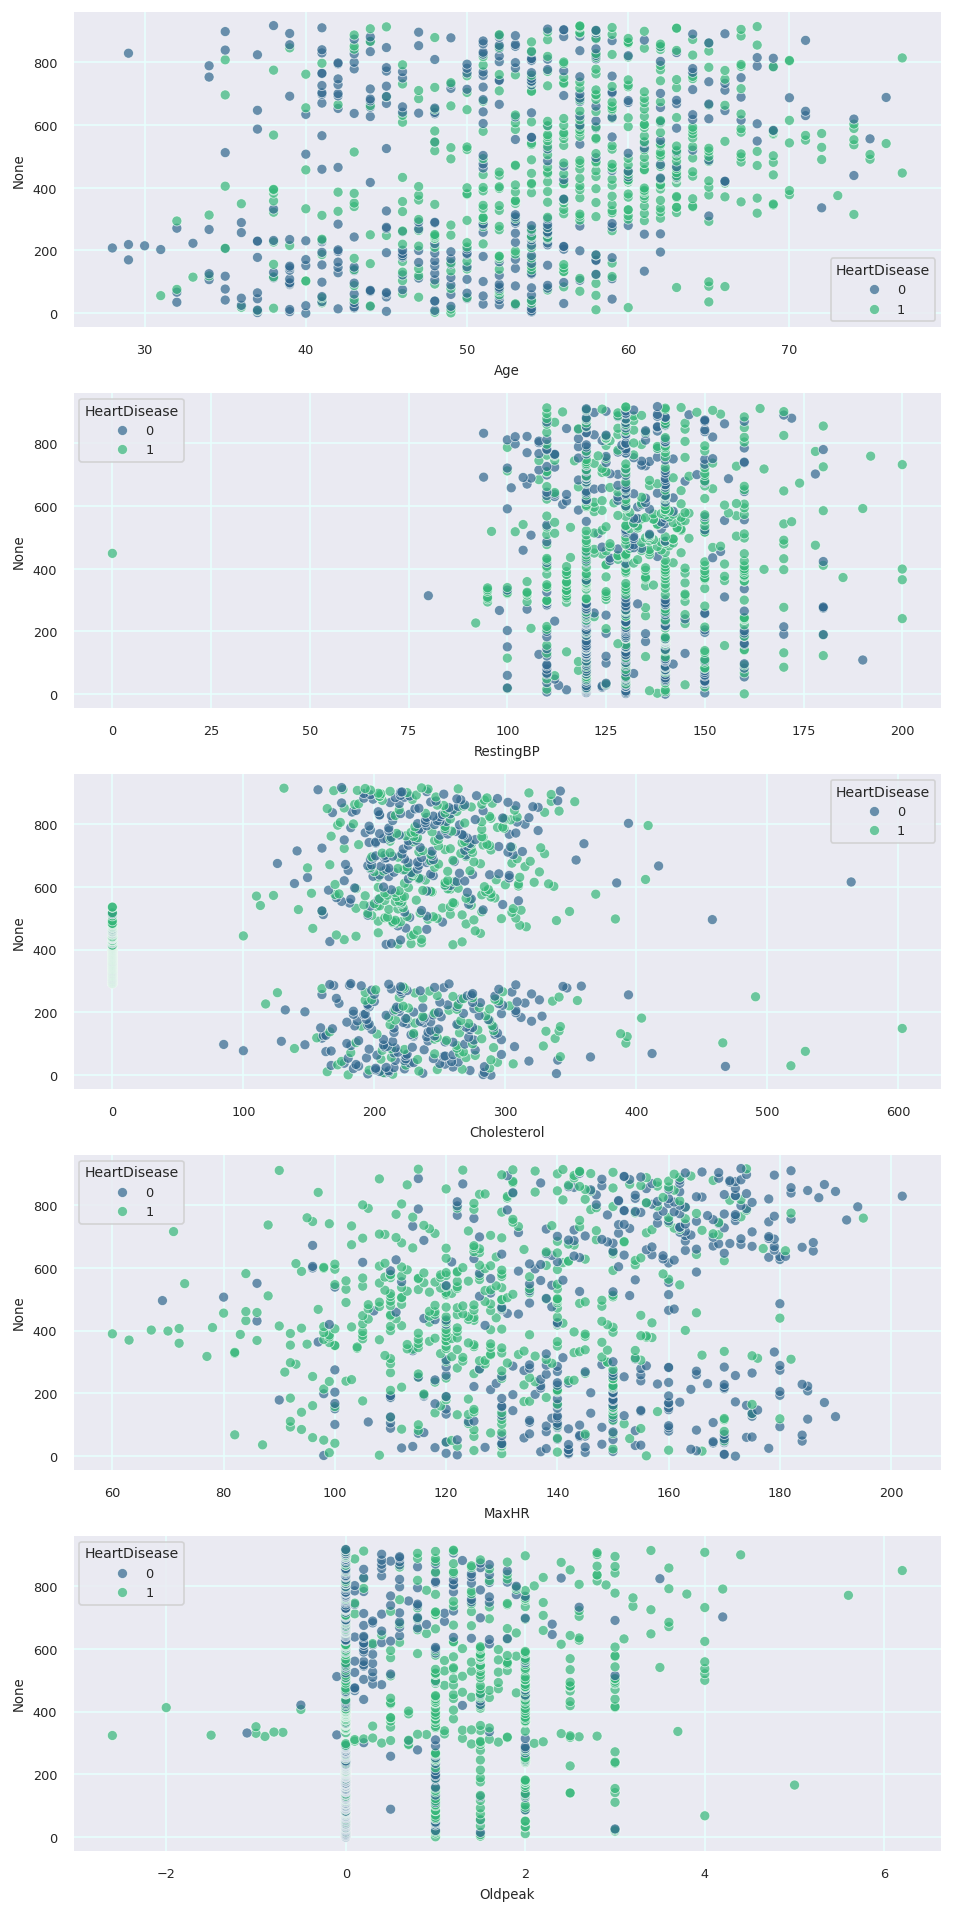

In [18]:
#
utils.generate_heart_disease_scatterplots(heart_data, numerical_features)

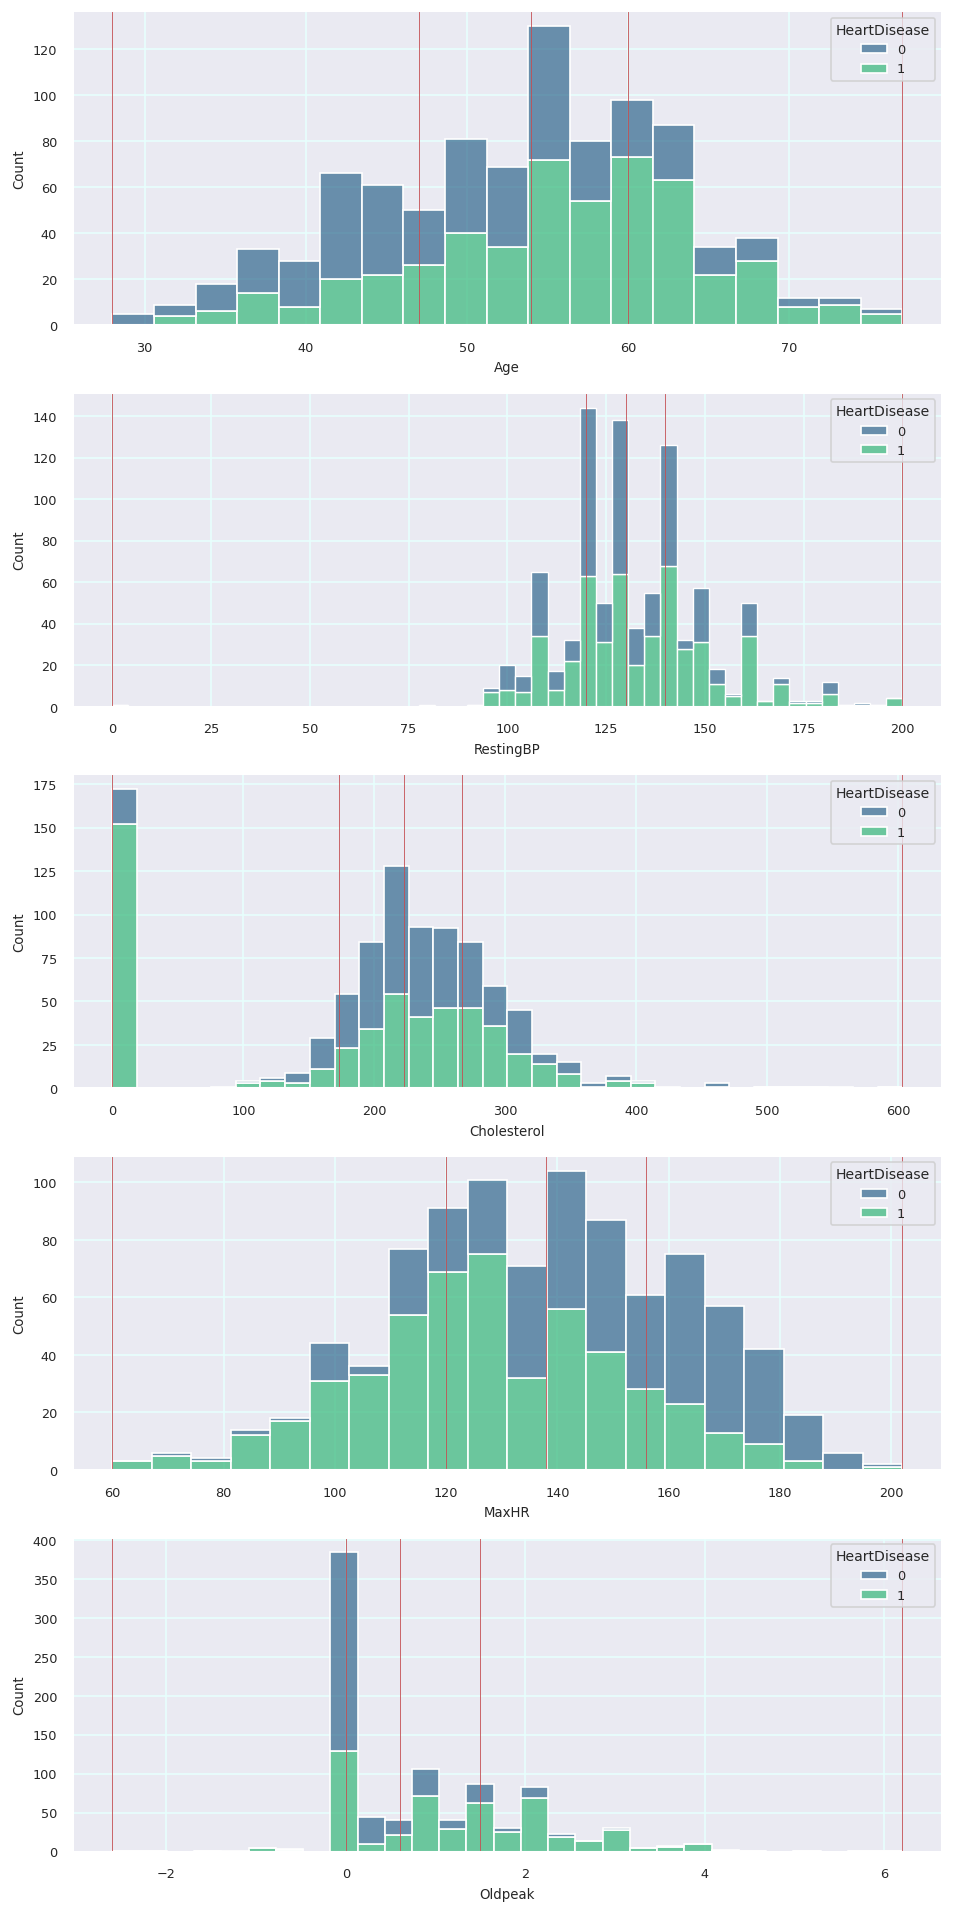

In [19]:
utils.generate_heart_disease_histogram(heart_data, numerical_features)

- As individuals are older, the likelihood of developing heart disease rises. The elderly demographic is primarily affected by this condition.

### Categorical features
Sex, FastingBS, ChestPainType, RestingECG, ExerciseAngina, ST_Slope

In [20]:
categorical_features = ["Sex", "FastingBS", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
# Plot histogram of these features
utils.plot_histogram(heart_data, categorical_features, bins=32)

interactive(children=(Dropdown(description='Feature', options=('Sex', 'FastingBS', 'ChestPainType', 'RestingEC…

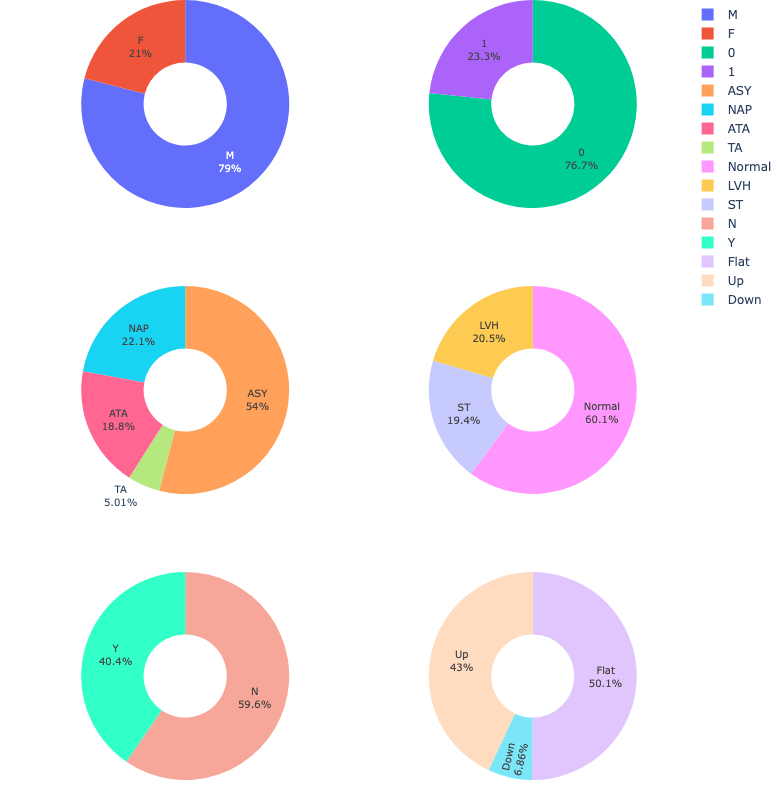

In [21]:
# Plot pie charts
rows = 3
cols = 2
specs = [[{"type": "domain"} for _ in range(cols)] for _ in range(rows)]
utils.plot_pie_charts(heart_data, categorical_features, rows=rows, cols=cols, specs=specs)

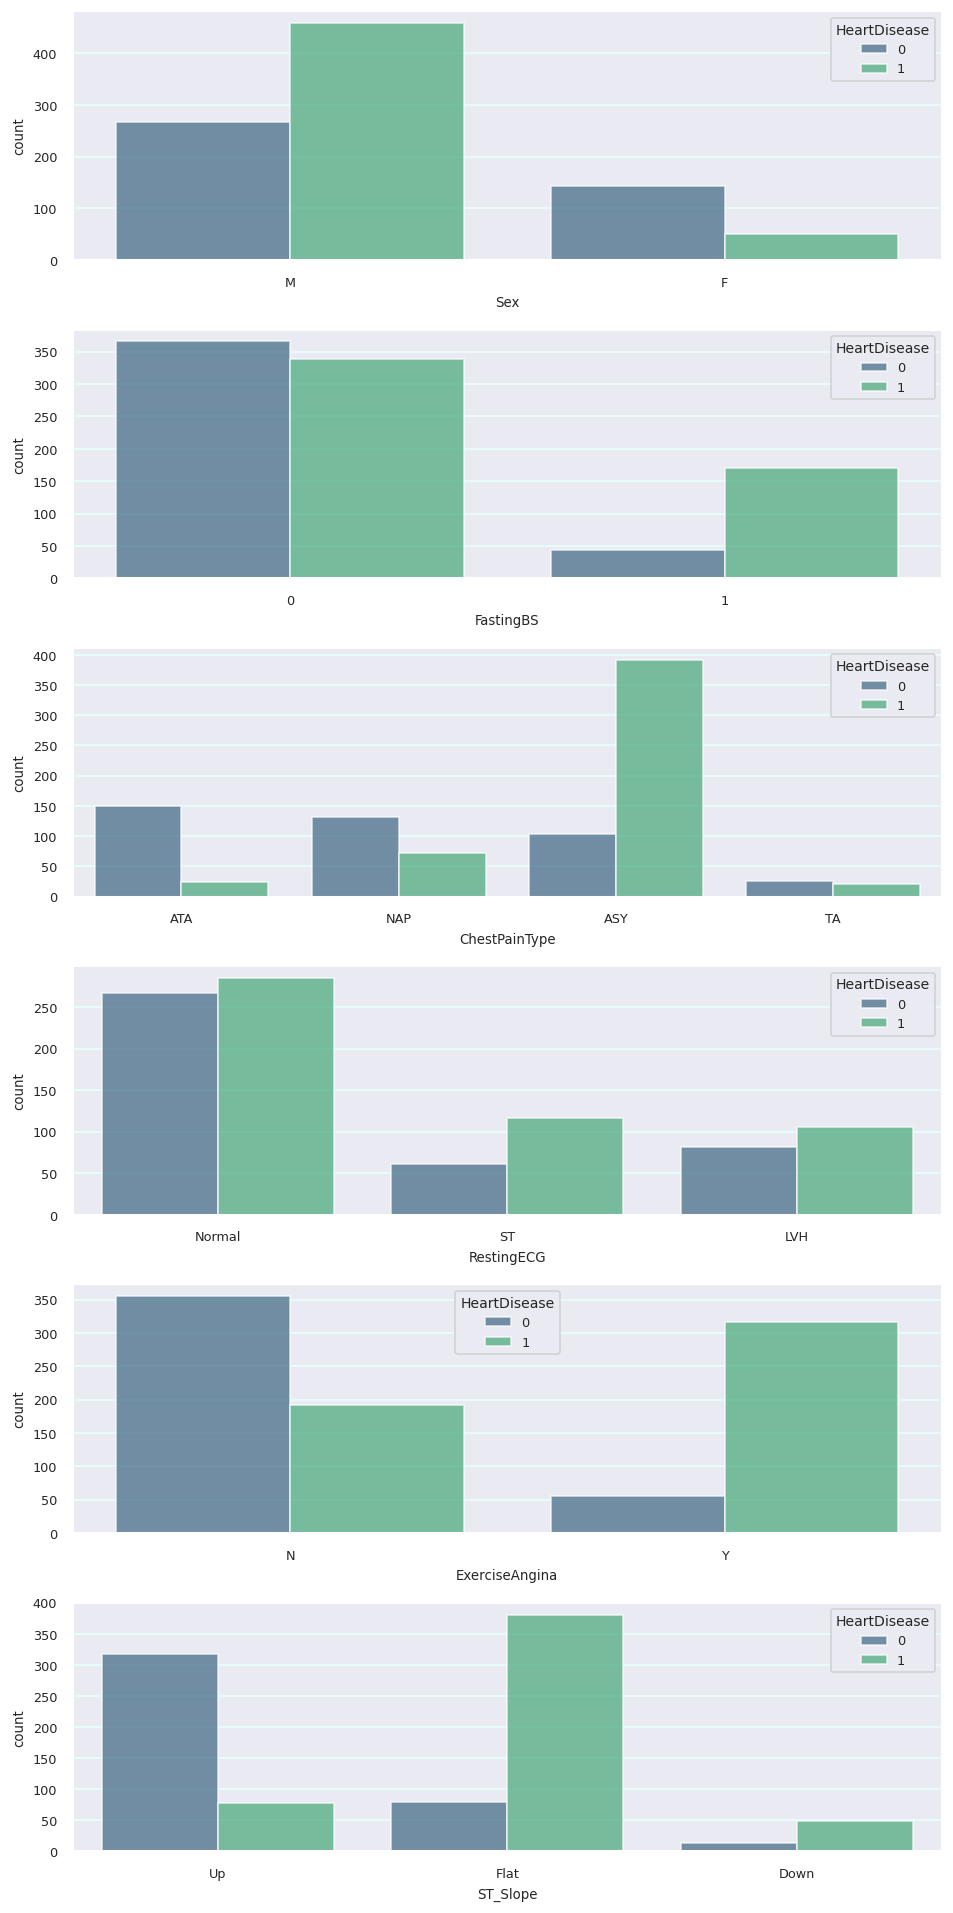

In [22]:
utils.generate_heart_disease_countplot(heart_data, categorical_features)

- The majority of patients with the disease are male.
- There are 4 types of ChestPain: TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic. Patients showing no symptoms are the most vulnerable to the disease.
- People with exercise-induced angina tend to have a higher proportion of individuals with the disease, while those without exercise-induced angina tend to have a higher proportion of individuals in good health.

### Group by Gender

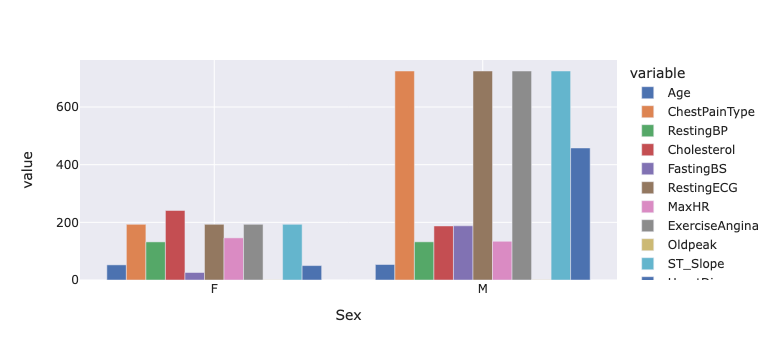

In [23]:
utils.group_by_gender(heart_data)